# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.
Hadi Fanaee-T at the University of Porto compiled this data into a CSV file.
The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. Data can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).


Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

The aim of this project is to predict the total number of bikes people rented in a given hour. To accomplish the goal few different machine learning models wil be created and their perforamce will be evaluated. 

## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

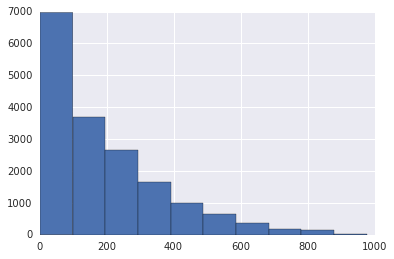

In [9]:
plt.hist(bike_rentals['cnt'])

In [12]:
corr = bike_rentals.corr()['cnt'].abs()

In [13]:
corr

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday       0.030927
weekday       0.026900
workingday    0.030284
weathersit    0.142426
temp          0.404772
atemp         0.400929
hum           0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

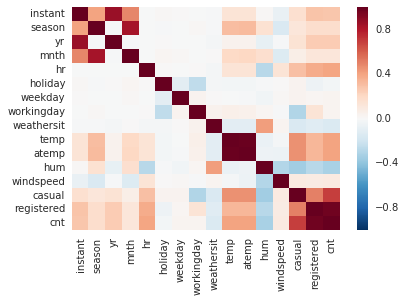

In [14]:
sns.heatmap(bike_rentals.corr())

The 'hr' column in dataset contains hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently without understanding that certain hours are related. Hence new column will be created with labels to introduce some order into the process. 

In [15]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    if hour >= 12 and hour < 18:
        return 2
    if hour >= 18 and hour < 24:
        return 3
    if hour >= 0 and hour < 6:
        return 4

In [17]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Data split

In [18]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [19]:
bike_rentals.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
time_label    0
dtype: int64

In [20]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
time_label    17379 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


Due to 'cnt' column is continuous numeric data the metric I have choosen to evaluate the peroframce is MSE. As this metric works well for this type of data.

In [21]:
train = bike_rentals.sample(frac=0.8)

In [22]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression

In [26]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [27]:
features = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
         'time_label']

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[features], train['cnt'])
predictions = lr.predict(test[features])

mse = mean_squared_error(test['cnt'], predictions)
mse


16964.25134462913

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train[features], train['cnt'])


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [33]:
predictions_tree = tree.predict(test[features])

np.mean((predictions_tree -test['cnt'])**2)

3440.2543153049482

In [34]:
# Experimenting with parameters

tree = DecisionTreeRegressor(min_samples_leaf = 5)
tree.fit(train[features], train['cnt'])
predictions_tree = tree.predict(test[features])

np.mean((predictions_tree -test['cnt'])**2)


2721.2379739470666

In [35]:
tree = DecisionTreeRegressor(min_samples_leaf = 10)
tree.fit(train[features], train['cnt'])
predictions_tree = tree.predict(test[features])

np.mean((predictions_tree -test['cnt'])**2)


2646.0542528503584

In [36]:
tree = DecisionTreeRegressor(min_samples_leaf = 2)
tree.fit(train[features], train['cnt'])
predictions_tree = tree.predict(test[features])

np.mean((predictions_tree -test['cnt'])**2)

3169.77191215957

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

## Random Forest 

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(train[features], train['cnt'])

predictions = rf.predict(test[features])

np.mean((predictions - test['cnt'])**2)

2074.373659378596

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_leaf = 5)

rf.fit(train[features], train['cnt'])

predictions = rf.predict(test[features])

np.mean((predictions - test['cnt'])**2)

2089.214371388335

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_leaf = 2)

rf.fit(train[features], train['cnt'])

predictions = rf.predict(test[features])

np.mean((predictions - test['cnt'])**2)

2050.51911794189

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.